In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## (a) Download the Combined Cycle Power Plant Data

In [6]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


## (b) Exploring Data

#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
print('The number of columns in the dataset is', df.shape[1], ',the columns are the \
4 Features consist of hourly average ambient variables Temperature(AT),\
Ambient Pressure(AP),Relative Humidity(RH) and Exhaust Vacuum(V) \
to predict the net hourly electrical energy output(EP) of the plant(prediction).')

print('\nThe number of rows in the dataset is', df.shape[0], ',rows represent the values of those features')

The number of columns in the dataset is 5 ,the columns are the 4 Features consist of hourly average ambient variables Temperature(AT),Ambient Pressure(AP),Relative Humidity(RH) and Exhaust Vacuum(V) to predict the net hourly electrical energy output(EP) of the plant(prediction).

The number of rows in the dataset is 9568 ,rows represent the values of those features


In [4]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

#### ii. Make a pairwise scatterplot of all variables. Describe findings.

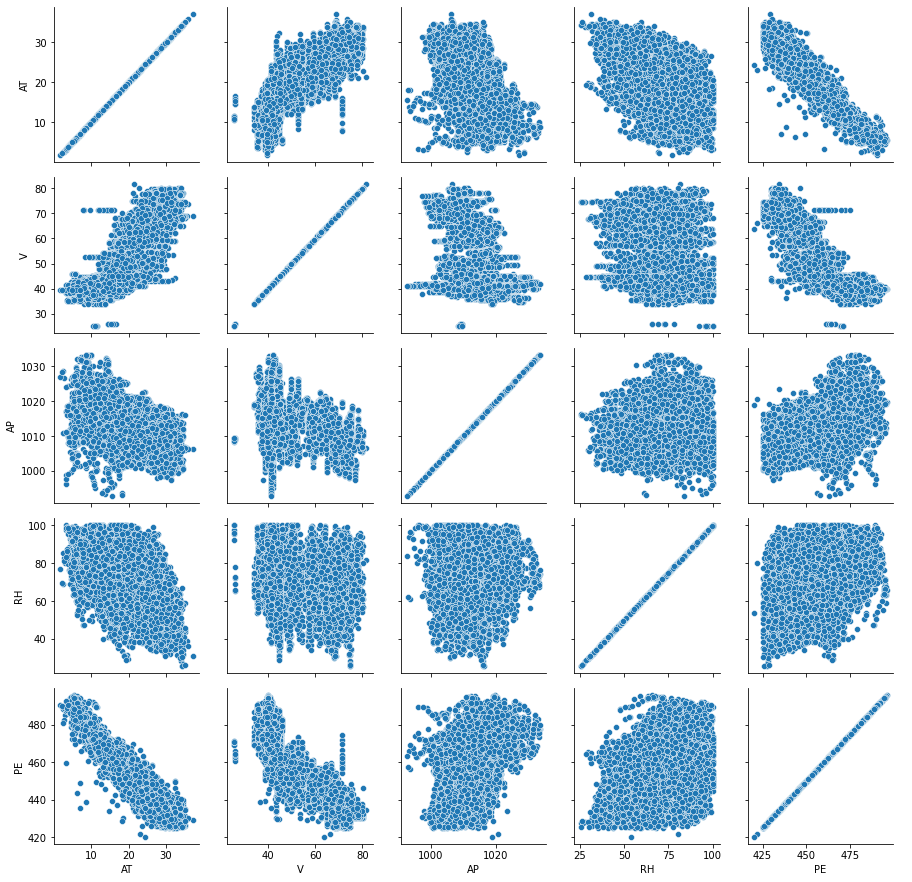

In [5]:
g = sns.PairGrid(df,vars = df.columns[0:6])
g.map(sns.scatterplot);
g.add_legend();

Findings: From the pairplots we can find that the correlation of independent variable V and independent variable AT is positive. The independent variables AT and V has negative correlation with dependent variable PE.

#### What are the mean, the median, range, first and third quartiles, and in-terquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [6]:
des = df.describe().T
des

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [31]:
mean = des['mean']
first_quartile = des['25%']
third_quartile = des['75%']
interquartile_range = third_quartile - first_quartile
range_df = [np.max(df[x]) - np.min(df[x]) for x in df.columns]
median_df = df.median()
summary = pd.DataFrame({'mean':mean, 'median':median_df, 'range':range_df, 'first quartiles':first_quartile, \
                       'third quatiles':third_quartile, 'in-terquartile ranges':interquartile_range}, index = df.columns)
summary

,mean,median,range,first quartiles,third quatiles,in-terquartile ranges
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


## (c) For each predictor, fit a simple linear regression model to predict the response.Describe your results.

/Users/rainie/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/rainie/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/rainie/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/rainie/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<Figure size 1152x864 with 0 Axes>

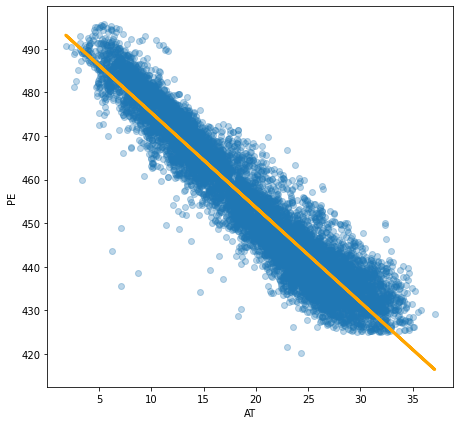

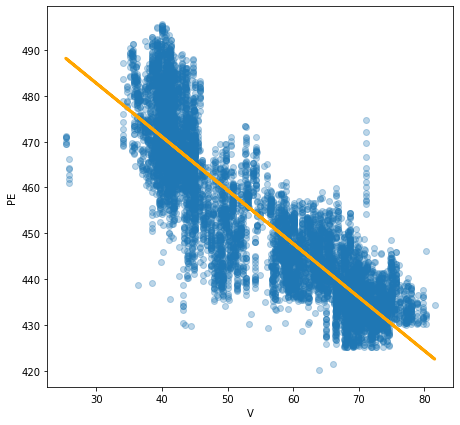

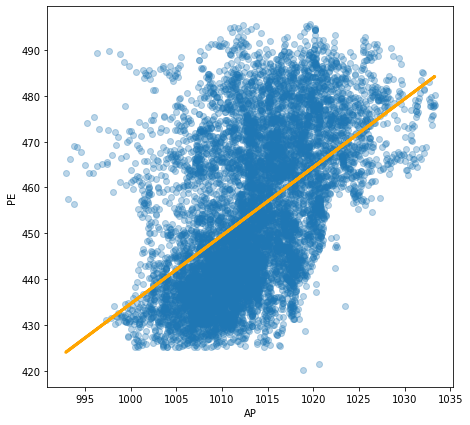

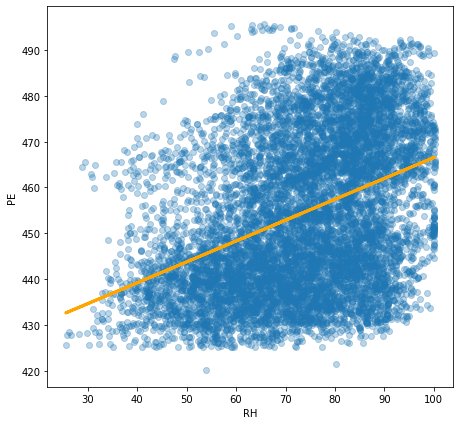

In [398]:
# plt.figure()
import statsmodels
plt.figure(figsize = (16, 12))
coeff = []
constant = []
count = 0
num_of_outliers = {}
for x in df.columns[0:4]:
    X_train = df[x]
    y_train = df['PE']
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    result = model.fit()
#     print(result.summary())
    coeff.append(result.params[1])
    constant.append(result.params[0])    
    
#     Find outliers using cook distance(source:https://www.statology.org/cooks-distance-python/)
    np.set_printoptions(suppress=True)

    #create instance of influence
    influence = result.get_influence()

    

    #obtain Cook's distance for each observation
    cooks = influence.cooks_distance

    outlier_dis = 4/9568 
    cook_dis = cooks[0]
    outliers = []
    dp = []
    for i in np.arange(len(cooks[0])):
        if cook_dis[i] > outlier_dis:
            outliers.append(cook_dis[i])
            dp.append(df[x][i])
    num_of_outliers[x]=len(outliers)
  


#      ploting values and outliers
    figure = plt.subplots(figsize=(16, 7))
    pred = result.predict(X_train)
    X_data = df[x].to_numpy()
    plt.subplot(1,2,1)
    plt.scatter(X_data, y_train, alpha = 0.3)
    plt.plot(X_data ,pred ,color='orange',linewidth =3)
    plt.xlabel(x)
    plt.ylabel('PE')
    
#     plt.subplot(1,2,2)
#     plt.boxplot(X_data)
#     plt.xlabel(x)
#     plt.show()
    
#     print(result.summary())
#     print(result.params)

In [399]:
params_sum = pd.DataFrame({"coefficient":coeff, "constant":constant}, index = df.columns[0:4])
params_sum
print(params_sum, '\nthe numbers of outliers for each predictor using cook distance are' ,num_of_outliers)

    coefficient     constant
AT    -2.171320   497.034120
V     -1.168135   517.801526
AP     1.489872 -1055.260989
RH     0.455650   420.961766 
the numbers of outliers for each predictor using cook distance are {'AT': 416, 'V': 423, 'AP': 300, 'RH': 249}


Conclusion: I used cook's distance and find outliers where the distance is over 4/n(n is the number of datapoints).

## (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results.

In [160]:
X_train = df[['AT', 'V','AP', 'RH']]
y_train = df['PE']
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:57:02   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

Conclusion: from the summary above, we can see that R-squared is 0.929(closer to 1), and p-values for all predictors are less than 0.05 which is statistically significant. Thus, we can reject the null hypothesis.

## (e) Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis.

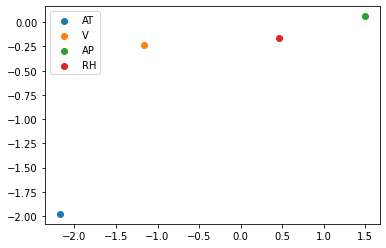

In [179]:
d_params = result.params
y_axis = [d_params[i] for i in np.arange(1, 5)]
for i in np.arange(len(coeff)):
    plt.scatter(coeff[i], y_axis[i], marker="o", label=df.columns[i])
    plt.legend()

## (f) Is there evidence of nonlinear association between any of the predictors and the response?

In [219]:
from sklearn.preprocessing import PolynomialFeatures
def build_polynimial_model(df, x, degree):
    coeff2=[]
    X_train = df[x]
    y_train = df['PE']
    poly = PolynomialFeatures(degree)
    Xtrain_poly = poly.fit_transform(X_train.to_numpy().reshape(-1, 1))
    X_train_new = sm.add_constant(Xtrain_poly)
    model = sm.OLS(y_train, X_train_new)
    result = model.fit()
#     print(result.params)
    table = pd.DataFrame({"beta_0": result.params[0], "beta_1":result.params[1],"beta_2":result.params[2],\
                          "beta_3":result.params[3]}, index = [x])  
    print(result.summary())
    return table


In [224]:
print("feautre = 'AT'")
f1 = build_polynimial_model(df, 'AT', 3)

feautre = 'AT'
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:09:00   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    7

Conclusion: Since the p-values are all lower than 0.05 and are significant, we reject the null hypothesis that there is an evidence of nonlinear association between the predictor and the response.

In [225]:
print("feautre = 'V'")
f1 = build_polynimial_model(df, 'V', 3)

feautre = 'V'
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:09:13   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     6

Conclusion: The P-values of x2, x3 are greater than 0.05 and not siginificant. We fail to reject hypothesis that there is no evidence of nonlinear association.

In [227]:
print("feautre = 'AP'")
f1 = build_polynimial_model(df, 'AP', 3)

feautre = 'AP'
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:09:34   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009     

Conclusion: Since the p-values are all lower than 0.05 and are significant, we reject the null hypothesis that there is an evidence of nonlinear association between the predictor and the response.

In [228]:
print("feautre = 'RH'")
f1 = build_polynimial_model(df, 'RH', 3)

feautre = 'RH'
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Thu, 22 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:09:42   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     

Conclusion: Since the p-values are all lower than 0.05 and are significant, we reject the null hypothesis that there is an evidence of nonlinear association between the predictor and the response.

## (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [229]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [236]:
ols = smf.ols(formula='PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=df)
model_g =ols.fit()
print(model_g.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:23:32   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Conclusion: The statistically significant interaction terms are AT* V, AT* RH, V* AP since their p-values are less than 0.05. On the other hand, V is also statistically significant with p-value < 0.05.

## (h) Can you improve your model using possible interaction terms or nonlinear asso-ciations between the predictors and response? Train the regression model on arandomly selected 70% subset of the data with all predictors. Also, run a regres-sion model involving all possible interaction terms and quadratic nonlinearities,and remove insignificant variables using p-values (be careful about interactionterms). Test both models on the remaining points and report your train and test MSEs.

In [368]:
from sklearn.model_selection import train_test_split
X = df[['AT', 'V','AP', 'RH']]
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape

((6697, 4), (2871, 4))

In [369]:
concat_train=pd.concat([X_train, pd.DataFrame(y_train)],axis = 1)
concat_train

,AT,V,AP,RH,PE
5805,14.84,41.23,995.02,88.00,464.85
4753,28.28,56.90,1006.38,64.99,445.61
626,13.22,44.92,1023.84,87.99,471.43
1218,26.94,59.87,1011.66,58.34,448.60
2928,19.04,51.86,1018.05,79.01,458.64
...,...,...,...,...,...
7060,9.09,41.92,1029.36,91.00,478.98
8554,25.09,57.43,1013.20,70.42,446.11
2481,9.80,41.82,1032.98,67.55,473.72
4047,19.68,62.96,1020.41,82.26,453.58


In [370]:
# train model using all predictors
from sklearn.metrics import mean_squared_error
ols = smf.ols(formula='PE ~ AT + V + AP + RH', data=concat_train)
model_h =ols.fit()
print(model_h.summary())

# Caculate MSE of both test and training sets
#     training set
y_pred_train = model_h.predict(X_train)
mse_train = mean_squared_error(y_train,y_pred_train)

#     test set
y_pred_test = model_h.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred_test)
mse_allpred = mse_test

print('\nMSE for training set is', mse_train, '\nMSE for test set is', mse_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.231e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:04:28   Log-Likelihood:                -19561.
No. Observations:                6697   AIC:                         3.913e+04
Df Residuals:                    6692   BIC:                         3.917e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    445.9485     11.576     38.525      0.0

Conclusion: all features are statistically significant due to the small p-value.

In [371]:
# models with all features, quadratic terms and interaction terms
ols = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(V,2) + np.power(AP,2) + np.power(RH,2) \
                        +AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH', data=concat_train)
model_h =ols.fit()
print(model_h.summary())

# Caculate MSE of both test and training sets
#     training set
y_pred_train = model_h.predict(X_train)
mse_train = mean_squared_error(y_train,y_pred_train)

#     test set
y_pred_test = model_h.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred_test)
mse_allterm = mse_test

print('\nMSE for training set is', mse_train, '\nMSE for test set is', mse_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     7441.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:04:34   Log-Likelihood:                -19072.
No. Observations:                6697   AIC:                         3.817e+04
Df Residuals:                    6682   BIC:                         3.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7951.5956   1433.050     

In [372]:
# from above regression summary, the significant terms are AT + V + AP + RH + 
#                         np.power(AT,2) + np.power(AP,2) + np.power(RH,2)
#                         +AT*V + AT*RH + AP*RH'

# models with significant features, quadratic terms and interaction terms
ols = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT,2) + np.power(AP,2) + np.power(RH,2) \
                        +AT*V + AT*RH + AP*RH', data=concat_train)
model_h =ols.fit()
print(model_h.summary())

#  Caculate MSE of both test and training sets
#     training set
y_pred_train = model_h.predict(X_train)
mse_train = mean_squared_error(y_train,y_pred_train)

#     test set
y_pred_test = model_h.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred_test)
mse_sig = mse_test

print('\nMSE for training set is', mse_train, '\nMSE for test set is', mse_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.040e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:04:39   Log-Likelihood:                -19079.
No. Observations:                6697   AIC:                         3.818e+04
Df Residuals:                    6686   BIC:                         3.825e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.101e+04   1083.475    -

From the regression model with all significance terms, the p-values are small(less than 0.05). THE values I dropped was np.power(V, 2), AT:AP, V:AP, V:RH.

## (i) Perform k-nearest neighbor regression for this dataset using both normalized and raw features

The best K in training set is:  1 with MSE is:  0.0
The best K in test set is:  5 with MSE is:  17.797549180076633


17.797549180076633

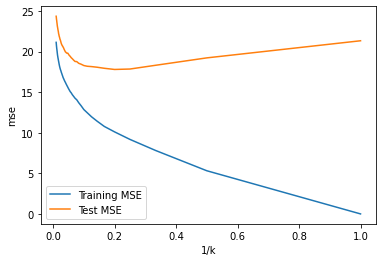

In [374]:
from sklearn.neighbors import KNeighborsRegressor
k_range = np.arange(1, 101)
X = df[['AT', 'V','AP', 'RH']]
y = df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
# KNN using raw feautres
def Knn_model(k_range, X_train, X_test, y_train, y_test):
#     X = df_norm[['AT', 'V','AP', 'RH']]
#     y = df_norm['PE']
#     print(y)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
    test_errors=[]
    train_errors=[]
    reverse_k = []
    best_train, best_test, best_k_train, best_k_test = 0, 0, 0, 0

    for i in k_range:
        model_i = KNeighborsRegressor(n_neighbors = i)
        model_i.fit(X_train, y_train)
        reverse_k.append(1/i)
   
        #  Caculate MSE of both test and training sets
        #     training set
        y_pred_train = model_i.predict(X_train)
        mse_train = mean_squared_error(y_train,y_pred_train)
        train_errors.append(mse_train)

        #     test set
        y_pred_test = model_i.predict(X_test)
        mse_test = mean_squared_error(y_test,y_pred_test)
        test_errors.append(mse_test)
        
        if mse_train <= np.min(train_errors):
            best_train= mse_train
            best_k_train = i
        if mse_test <= np.min(test_errors):
            best_test= mse_test
            best_k_test = i

    plt.plot(reverse_k, train_errors, label = "Training MSE")
    plt.plot(reverse_k, test_errors, label = "Test MSE")
    plt.xlabel("1/k")
    plt.ylabel("mse")
    plt.legend()

    print("The best K in training set is: ", best_k_train, "with MSE is: ", best_train)
    print("The best K in test set is: ", best_k_test, "with MSE is: ", best_test)
    return np.min(test_errors)
raw_knn_mse = Knn_model(k_range, X_train, X_test, y_train, y_test)
raw_knn_mse

In [378]:
X_train = (X_train-X_train.mean()) / np.std(X_train)
X_test = (X_test-X_test.mean()) / np.std(X_test)
X_train

,AT,V,AP,RH
5805,-0.643672,-1.019192,-3.075555,1.001239
4753,1.167143,0.209731,-1.158215,-0.573055
626,-0.861939,-0.729803,1.788682,1.000555
1218,0.986600,0.442653,-0.267057,-1.028033
2928,-0.077792,-0.185532,0.811446,0.386163
...,...,...,...,...
7060,-1.418388,-0.965079,2.720347,1.206493
8554,0.737344,0.251296,-0.007136,-0.201546
2481,-1.322727,-0.972922,3.331330,-0.397905
4047,0.008437,0.684987,1.209767,0.608521


The best K in training set is:  1 with MSE is:  0.0
The best K in test set is:  3 with MSE is:  16.76296693370486


16.76296693370486

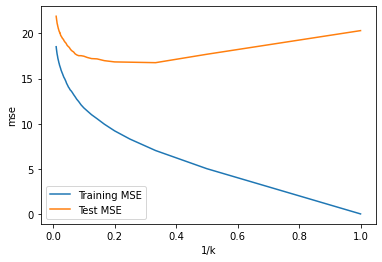

In [379]:
# KNN using normalized feautres
norm_knn_mse = Knn_model(k_range, X_train, X_test, y_train, y_test)
norm_knn_mse

## (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

In [384]:
result_mse = pd.DataFrame({'allpred_lm_mse':mse_allpred, 'allterm_lm_mse':mse_allterm,\
                           'signi_lm_mse': mse_sig, 'raw_knn_mse':raw_knn_mse, 'norm_knn_mse':norm_knn_mse}, index=['test_error'])
result_mse

,allpred_lm_mse,allterm_lm_mse,signi_lm_mse,raw_knn_mse,norm_knn_mse
test_error,22.188693,19.73003,19.747089,17.797549,16.762967


Conclusion: The KNN model with normalized features has the lowest the mse. Since the demension of the dataset is small(4 fetures), KNN performs better than the linear regression model. On the other hand, the dataset is not linear thus mse would be larger.

## 2. ISLR: 2.4.1

#### Indicate whether we would generally expect the performance of a flexible statistial learning method to be better of worse than an infelxible method. Justify your answer.

#### (a) The sample size n is extremely large, and the number of predictors p is small.
 Since the sample size n is very large with small numbers of features, the performance of a flexible statistical learning method is better than an inflexible method to find more acurate distribution for dataset.
#### (b) The number of predictors p is extremely large, and the number of observations n is small.
Since there are many features, the performance of a flexible statistical learning method is worse than an inflexible method. Flexible method may cause overfitting.
#### (c) The relationship between the predictors and response is highly non-linear.
Since the relationship is non-linear, the performance of a flexible statistical learning method is better because it will find more acurate distribution and have a better fit. Inflexible method cannot deal with non-linear method well.
#### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
The performance of a flexible statistical learning method is worse. The variance of the error terms causes overfitting. There are many outliers and flexible method may fit those outliers and have bad performance.

## 3. ISLR: 2.4.7

In [394]:
t = pd.DataFrame({'Obs.':[1,2,3,4,5,6], 'X1':[0,2,0,0,-1,1], 'X2': [3,0,1,1,0,1], 'X3':[0,0,3,2,1,1],\
                  'Y':['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}, index = [0,1,2,3,4,5]).set_index('Obs.')
t

,X1,X2,X3,Y
Obs.,,,,
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


#### Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
#### (a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.

In [393]:
obs1 = np.sqrt(3**2)
obs2 = np.sqrt(2**2)
obs3 = np.sqrt(1**2 + 3**2)
obs4 = np.sqrt(1**2 + 2**2)
obs5 = np.sqrt(1**2 + 1**2)
obs6 = np.sqrt(1**2 + 1**2 + 1**2)
obs1, obs2, obs3, obs4, obs5, obs6

(3.0,
 2.0,
 3.1622776601683795,
 2.23606797749979,
 1.4142135623730951,
 1.7320508075688772)

#### (b) What is our prediction with K = 1? Why?

Green. We choose the closet distance to k = 1 which is obs5(1.414).

#### (c) What is our prediction with K = 3? Why?

Red. The points close to K=3 are red(obs1, obs3), and most of the points are red.

#### (d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

Since the boundary is highly non-linear, we need a more flexible method to perform. Thus, K need to be small to be more complex. Higher k value is smoother and has problem to deal with highly non-linear.